In [1]:
from mapper_base import MapperBase
from astropy.io import fits
from astropy.table import Table

import mapper_KV450
import pyccl as ccl
import numpy as np
import pylab as plt
import pymaster as nmt
import healpy as hp
import os

In [2]:
# Initialize binning scheme with 20 ells per bandpower
nside = 512
ells = []
i = 11.5
while i <= 3 * nside:
    ells.append(round(i))
    #i = i*(1+i/(3 * nside))
    i = i+20*(1+i/240)

bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [3]:
path = '/home/zcapjru/PhD/Data/KV450/'

cats = [path+'KV450_G12_reweight_3x4x4_v2_good.cat', 
        path+'KV450_G23_reweight_3x4x4_v2_good.cat',
        path+'KV450_GS_reweight_3x4x4_v2_good.cat',
        path+'KV450_G15_reweight_3x4x4_v2_good.cat',
        path+'KV450_G9_reweight_3x4x4_v2_good.cat'
       ]
cats

['/home/zcapjru/PhD/Data/KV450/KV450_G12_reweight_3x4x4_v2_good.cat',
 '/home/zcapjru/PhD/Data/KV450/KV450_G23_reweight_3x4x4_v2_good.cat',
 '/home/zcapjru/PhD/Data/KV450/KV450_GS_reweight_3x4x4_v2_good.cat',
 '/home/zcapjru/PhD/Data/KV450/KV450_G15_reweight_3x4x4_v2_good.cat',
 '/home/zcapjru/PhD/Data/KV450/KV450_G9_reweight_3x4x4_v2_good.cat']

In [4]:
KV_1_config = {'data_catalogs': cats , 
                'file_nz':path + 'REDSHIFT_DISTRIBUTIONS/Nz_DIR/Nz_DIR_Mean/Nz_DIR_z0.1t0.3.asc',
          'zbin':1,
          'nside':nside, 
          'mask_name': 'mask_KV450_1', 
          'lite_path': '/home/zcapjru/PhD/Data/KV_lite_cats/'}

KV_5_config = {'data_catalogs': cats ,               
                'file_nz':path + 'REDSHIFT_DISTRIBUTIONS/Nz_DIR/Nz_DIR_Mean/Nz_DIR_z0.9t1.2.asc',
          'zbin':5,
           'mask_name': 'mask_KV450_5',
          'nside':nside,
          'lite_path': '/home/zcapjru/PhD/Data/KV_lite_cats/'}

In [5]:
KV_1_maps = mapper_KV450.MapperKV450(KV_1_config)
KV_5_maps = mapper_KV450.MapperKV450(KV_5_config)

loading lite cats mode: shear Catalogs loaded removed GAAP Data binned Additive biased removed 

/home/zcapjru/PhD/DEScls/mappers/mapper_KV450.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cat_data[sel_gals]['bias_corrected_e1'] -= np.mean(self.cat_data[sel_gals]['bias_corrected_e1'])
/home/zcapjru/PhD/DEScls/mappers/mapper_KV450.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cat_data[sel_gals]['bias_corrected_e2'] -= np.mean(self.cat_data[sel_gals]['bias_corrected_e2'])
/home/zcapjru/PhD/DEScls/mappers/mapper_KV450.py:120: SettingWithCopyWarning: 
A value is trying to be set o

Multiplicative bias removed loading lite cats 

/home/zcapjru/PhD/DEScls/mappers/mapper_KV450.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cat_data[sel_gals]['bias_corrected_e2'] /= 1 + m[self.zbin-1]


mode: shear Catalogs loaded removed GAAP Data binned 

/home/zcapjru/PhD/DEScls/mappers/mapper_KV450.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cat_data[sel_gals]['bias_corrected_e1'] -= np.mean(self.cat_data[sel_gals]['bias_corrected_e1'])


Additive biased removed 

/home/zcapjru/PhD/DEScls/mappers/mapper_KV450.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cat_data[sel_gals]['bias_corrected_e2'] -= np.mean(self.cat_data[sel_gals]['bias_corrected_e2'])
/home/zcapjru/PhD/DEScls/mappers/mapper_KV450.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cat_data[sel_gals]['bias_corrected_e1'] /= 1 + m[self.zbin-1]


Multiplicative bias removed 

/home/zcapjru/PhD/DEScls/mappers/mapper_KV450.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cat_data[sel_gals]['bias_corrected_e2'] /= 1 + m[self.zbin-1]


In [6]:
KV_nz_1 = KV_1_maps.dndz
KV_z_1 = KV_nz_1[0]
KV_dNdz_1 = KV_nz_1[1]

KV_nz_5 = KV_5_maps.dndz
KV_z_5 = KV_nz_5[0]
KV_dNdz_5 = KV_nz_5[1]

In [7]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.049, h=0.67, sigma8=0.81, n_s=0.96)
ia = np.ones(120)*0.981

KV_theory_1 = ccl.WeakLensingTracer(cosmo,  dndz=(KV_z_1,KV_dNdz_1), has_shear=True, ia_bias=(KV_z_1,ia), use_A_ia=True)
Theory_cl_s1s1 = ccl.angular_cl(cosmo, KV_theory_1, KV_theory_1, ell_arr) 

KV_theory_5 = ccl.WeakLensingTracer(cosmo,  dndz=(KV_z_5,KV_dNdz_5), has_shear=True, ia_bias=(KV_z_5,ia), use_A_ia=True)
Theory_cl_s5s5 = ccl.angular_cl(cosmo, KV_theory_5, KV_theory_5, ell_arr) 

Theory_cl_s1s5 = ccl.angular_cl(cosmo, KV_theory_1, KV_theory_5, ell_arr)

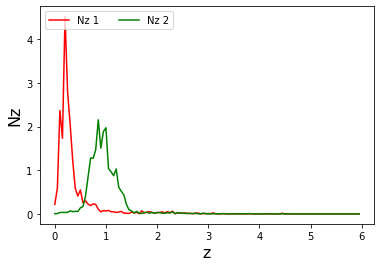

In [8]:
plt.plot(KV_z_1, KV_dNdz_1, 'r-', label='Nz 1')
plt.plot(KV_z_5, KV_dNdz_5, 'g-', label='Nz 2')

plt.xlabel('z', fontsize=16)
plt.ylabel('Nz', fontsize=16)
plt.legend(loc='upper left', ncol=2, labelspacing=0.1)
plt.show()

In [9]:
KV_shear_1 = KV_1_maps.get_signal_map(mode = 'shear')
KV_psf_1 = KV_1_maps.get_signal_map(mode = 'PSF')
KV_stars_1 = KV_1_maps.get_signal_map(mode = 'stars')

KV_shear_5 = KV_5_maps.get_signal_map(mode = 'shear')
KV_psf_5 = KV_5_maps.get_signal_map(mode = 'PSF')
KV_stars_5 = KV_5_maps.get_signal_map(mode = 'stars')

Calculating shear spin-2 field
Calculating PSF spin-2 field
Calculating star density spin-0 field
Calculating shear spin-2 field
Calculating PSF spin-2 field
Calculating star density spin-0 field


In [10]:
KV_galaxy_mask_1 = KV_1_maps.get_mask(mode='shear')
KV_galaxy_mask_1 = KV_1_maps.get_mask(mode='PSF')
KV_star_mask_1 = KV_1_maps.get_mask(mode='stars')

KV_galaxy_mask_5 = KV_5_maps.get_mask(mode='shear')
KV_galaxy_mask_5 = KV_5_maps.get_mask(mode='PSF')
KV_star_mask_5 = KV_5_maps.get_mask(mode='stars')

Using galaxies mask
Using galaxies mask
Using stars mask
Using galaxies mask
Using galaxies mask
Using stars mask


In [11]:
KV_shear_f_1 =   KV_1_maps.get_nmt_field(mode='shear')
KV_psf_f_1 =   KV_1_maps.get_nmt_field(mode='PSF')
KV_stars_f_1 =   KV_1_maps.get_nmt_field(mode='stars')

KV_shear_f_5 =   KV_5_maps.get_nmt_field(mode='shear')
KV_psf_f_5 =   KV_5_maps.get_nmt_field(mode='PSF')
KV_stars_f_5 =   KV_5_maps.get_nmt_field(mode='stars')

Calculating shear spin-2 field
Using galaxies mask
Calculating PSF spin-2 field
Using galaxies mask
Calculating star density spin-0 field
Using stars mask
Calculating shear spin-2 field
Using galaxies mask
Calculating PSF spin-2 field
Using galaxies mask
Calculating star density spin-0 field
Using stars mask


In [12]:
KV_w_s1s1 = nmt.NmtWorkspace()
KV_w_s1s1.compute_coupling_matrix(KV_shear_f_1, KV_shear_f_1, bands)

KV_w_s1s5 = nmt.NmtWorkspace()
KV_w_s1s5.compute_coupling_matrix(KV_shear_f_1, KV_shear_f_5, bands)

KV_w_s5s5 = nmt.NmtWorkspace()
KV_w_s5s5.compute_coupling_matrix(KV_shear_f_5, KV_shear_f_5, bands)

In [13]:
def compute_cl(f_a, f_b, wsp):
    # Compute the power spectrum (a la anafast) of the masked fields
    # Note that we only use n_iter=0 here to speed up the computation,
    # but the default value of 3 is recommended in general.
    cl_coupled = nmt.compute_coupled_cell(f_a, f_b)
    # Decouple power spectrum into bandpowers inverting the coupling matrix
    cl_decoupled = wsp.decouple_cell(cl_coupled) #removed bias here

    return cl_decoupled

In [14]:
KV_nl_s1s1 = KV_1_maps.get_nl_coupled(mode='shear')
KV_nl_s1s1 = KV_w_s1s1.decouple_cell(KV_nl_s1s1)

KV_nl_s5s5 = KV_5_maps.get_nl_coupled(mode='shear')
KV_nl_s5s5 = KV_w_s5s5.decouple_cell(KV_nl_s5s5)

Calculating shear nl coupled
Calculating shear nl coupled


In [15]:
cl_s1s1 = compute_cl(KV_shear_f_1, KV_shear_f_1, KV_w_s1s1)
cl_s1s5 = compute_cl(KV_shear_f_1, KV_shear_f_5, KV_w_s1s5)
cl_s5s5 = compute_cl(KV_shear_f_5, KV_shear_f_5, KV_w_s5s5)
#print(cl_s1s1, KV_nl_s1s1)
#cl_s1s1 = cl_s1s1 - KV_nl_s1s1

In [16]:
def load_carlos_cl(a, b):
    return np.load('/home/zcapjru/PhD/Data/Carlos_KV/cl_KVwl{}_KVwl{}.npz'.format(a,b))
def load_jaime_cl(a, b):
    return np.loadtxt('/home/zcapjru/PhD/Cls/KV450/KV450_cl_{}{}.txt'.format(a,b))
def load_jaime_nl(a, b):
    return np.loadtxt('/home/zcapjru/PhD/Cls/KV450/KV450_nl_{}{}.txt'.format(a,b))

In [17]:
carlos11 = load_carlos_cl(0,0)
jcl11 = load_jaime_cl(0,0)[0]
jnl11 = load_jaime_nl(0,0)[0]

carlos15 = load_carlos_cl(0,4)
jcl15 = load_jaime_cl(0,4)[0]
#jnl11 = load_jaime_nl(0,4)[0]

carlos55 = load_carlos_cl(4,4)
jcl55 = load_jaime_cl(4,4)[0]
jnl55 = load_jaime_nl(4,4)[0]

In [30]:
print(len(jcl11), len(carlos11['nl'][0]))

39 39


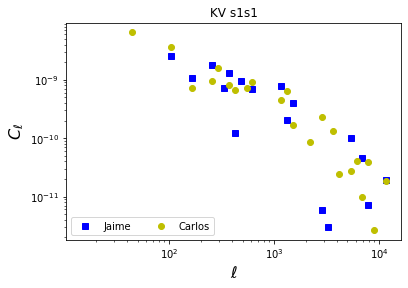

In [46]:
#plt.plot(ell_arr, cl_s1s1[0] -KV_nl_s1s1[0], 'bo-', label='Empirical')
plt.plot(carlos11['ell'], jcl11-jnl11, 'bs', label='Jaime')
plt.plot(carlos11['ell'], carlos11['cl'][0] , 'yo', label='Carlos')
#plt.plot(ell_arr,Theory_cl_s1s1, 'r--', label='Theory')

#plt.plot(ell_arr, DES_theory_11, 'r--', label='Theory cl_ij')
#plt.plot(ccl_11['ell'], ccl_11['cl'][0], 'g-', label='Carlos cl_ij')

plt.loglog()
plt.title('KV s1s1')
#plt.xlim((ell_arr[1], ell_arr[-1]))
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

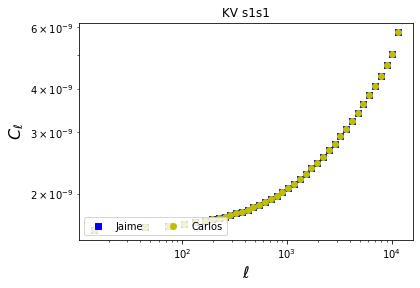

In [45]:
#plt.plot(ell_arr, cl_s1s1[0] -KV_nl_s1s1[0], 'bo-', label='Empirical')
plt.plot(carlos11['ell'], jnl11, 'bs', label='Jaime')
plt.plot(carlos11['ell'], carlos11['nl'][0] , 'yo', label='Carlos')
#plt.plot(ell_arr,Theory_cl_s1s1, 'r--', label='Theory')

#plt.plot(ell_arr, DES_theory_11, 'r--', label='Theory cl_ij')
#plt.plot(ccl_11['ell'], ccl_11['cl'][0], 'g-', label='Carlos cl_ij')

plt.loglog()
plt.title('KV s1s1')
#plt.xlim((ell_arr[1], ell_arr[-1]))
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

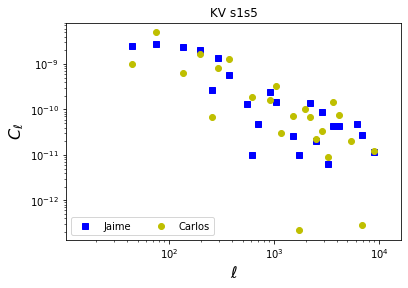

In [44]:
#plt.plot(ell_arr, cl_s1s1[0] -KV_nl_s1s1[0], 'bo-', label='Empirical')
plt.plot(carlos15['ell'], jcl15, 'bs', label='Jaime')
plt.plot(carlos15['ell'], carlos15['cl'][0] , 'yo', label='Carlos')
#plt.plot(ell_arr,Theory_cl_s1s1, 'r--', label='Theory')

#plt.plot(ell_arr, DES_theory_11, 'r--', label='Theory cl_ij')
#plt.plot(ccl_11['ell'], ccl_11['cl'][0], 'g-', label='Carlos cl_ij')

plt.loglog()
plt.title('KV s1s5')
#plt.xlim((ell_arr[1], ell_arr[-1]))
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

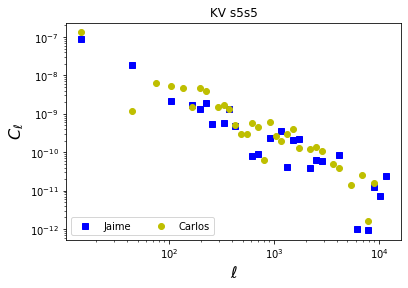

In [43]:
#plt.plot(ell_arr, cl_s1s1[0] -KV_nl_s1s1[0], 'bo-', label='Empirical')
plt.plot(carlos55['ell'], jcl55-jnl55, 'bs', label='Jaime')
plt.plot(carlos55['ell'], carlos55['cl'][0] , 'yo', label='Carlos')
#plt.plot(ell_arr,Theory_cl_s1s1, 'r--', label='Theory')

#plt.plot(ell_arr, DES_theory_11, 'r--', label='Theory cl_ij')
#plt.plot(ccl_11['ell'], ccl_11['cl'][0], 'g-', label='Carlos cl_ij')

plt.loglog()
plt.title('KV s5s5')
#plt.xlim((ell_arr[1], ell_arr[-1]))
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

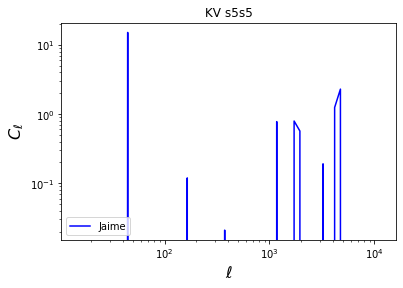

In [48]:
#plt.plot(ell_arr, cl_s1s1[0] -KV_nl_s1s1[0], 'bo-', label='Empirical')
plt.plot(carlos55['ell'], (jcl55-jnl55-carlos55['cl'][0])/carlos55['cl'][0], 'b-', label='Jaime')
#plt.plot(ell_arr,Theory_cl_s1s1, 'r--', label='Theory')

#plt.plot(ell_arr, DES_theory_11, 'r--', label='Theory cl_ij')
#plt.plot(ccl_11['ell'], ccl_11['cl'][0], 'g-', label='Carlos cl_ij')

plt.loglog()
plt.title('KV s5s5')
#plt.xlim((ell_arr[1], ell_arr[-1]))
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

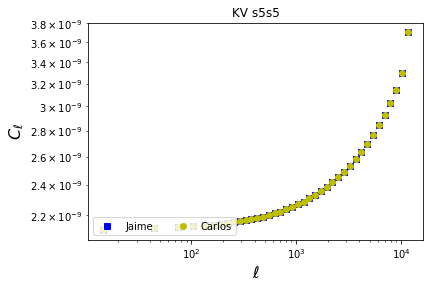

In [39]:
#plt.plot(ell_arr, cl_s1s1[0] -KV_nl_s1s1[0], 'bo-', label='Empirical')
plt.plot(carlos55['ell'], jnl55, 'bs', label='Jaime')
plt.plot(carlos55['ell'], carlos55['nl'][0] , 'yo', label='Carlos')
#plt.plot(ell_arr,Theory_cl_s1s1, 'r--', label='Theory')

#plt.plot(ell_arr, DES_theory_11, 'r--', label='Theory cl_ij')
#plt.plot(ccl_11['ell'], ccl_11['cl'][0], 'g-', label='Carlos cl_ij')

plt.loglog()
plt.title('KV s5s5')
#plt.xlim((ell_arr[1], ell_arr[-1]))
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()